# Online Retail

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Cleansing

### Load and Understand Data

Pertama-tama kita load dan read data dari file .csv terlebih dahulu.

In [2]:
online_retail = pd.read_csv('OnlineRetail.csv', encoding='latin-1', parse_dates=[4])
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
online_retail.shape

(541909, 8)

Berikut adalah penjelasan mengenai data di atas :
* InvoiceNo merupakan kolom yang berisi nomor invoice yang diberikan secara unik pada tiap transaksinya. Jika kode   dimulai dengan huruf 'c', ini menandakan pembatalan.
* StockCode merupakan kolom berisikan kode dari masing-masing produk yang diberikan secara unik.
* Description merupakan kolom dari nama-nama produk.
* Quantity adalah jumlah setiap produk (item) per transaksi. Jika value bernilai negatif probably barang tersebut   direturn oleh pembeli.
* InvoiceDate adalah hari dan waktu setiap transaksi dibuat.
* UnitPrice berisikan harga produk per unit dalam sterling.
* CustomerID adalah kolom yang berisikan nomor customer yang diberikan secara unik untuk setiap customernya.
* Country  adalah kolom berisikan nama negara dari customer berasal

### Check for _Null Value_

In [4]:
online_retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dari hasil di atas dapat diketahui bahwa kolom `Description` dan `CustomerID` memiliki beberapa missing value. Kita dapat menghapus missing value tersebut.

In [5]:
online_retail.dropna(inplace=True)
online_retail.reset_index(drop=True, inplace=True)

Cek kembali missing value dari data.

In [6]:
online_retail.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406829 entries, 0 to 406828
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 24.8+ MB


### Data Manipulate in Column

Berdasarkan data di atas, kolom `CustomerID` memiliki tipe data numerik yang berupa float. Kita akan mengubah data ini menjadi tipe string guna memudahkan proses modeling (bila ada).

In [9]:
online_retail['CustomerID'] = online_retail['CustomerID'].astype(str)

In [10]:
online_retail.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID             object
Country                object
dtype: object

### Check Outlier Data

In [11]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Quantity

In [12]:
print('Mean Unit Price : ', online_retail['Quantity'].mean())
print('Median Unit Price : ', online_retail['Quantity'].median())

Mean Unit Price :  12.06130339774205
Median Unit Price :  5.0


Text(0, 0.5, 'count')

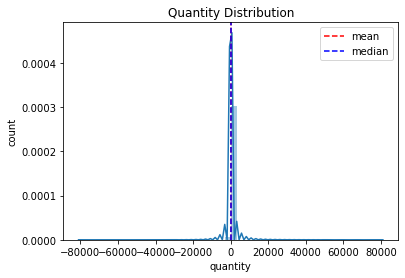

In [13]:
sns.distplot(online_retail['Quantity'])
line3 = plt.axvline(online_retail['Quantity'].mean(), color='r', linestyle='--', label='mean')
line4 = plt.axvline(online_retail['Quantity'].median(), color='b', linestyle='--', label='median')
plt.title('Quantity Distribution')
plt.legend(handles=[line3,line4], loc=1)
plt.xlabel('quantity')
plt.ylabel('count')

Berdasarkan grafik distribusi di atas, kita dapat menarik insight bahwa ada beberapa item yang quantitynya di bawah 0 atau bernilai negatif. Seperti yang telah dijelaskan di atas, quantity yang bernilai negatif merupakan barang yang direturn. Mari kita buat DataFrame untuk quantity di bawah 0.

In [14]:
quantity_under_zero = online_retail[online_retail['Quantity']<0]
quantity_under_zero

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
406377,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
406461,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
406635,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
406636,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


#### UnitPrice

In [15]:
print('Mean Unit Price : ', online_retail['UnitPrice'].mean())
print('Median Unit Price : ', online_retail['UnitPrice'].median())

Mean Unit Price :  3.4604710185298773
Median Unit Price :  1.95


Text(0, 0.5, 'count')

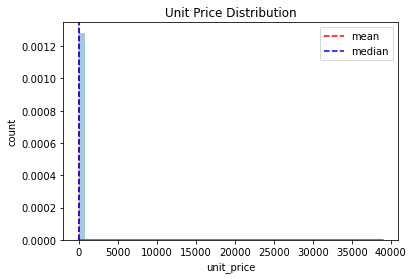

In [16]:
sns.distplot(online_retail['UnitPrice'])
line3 = plt.axvline(online_retail['UnitPrice'].mean(), color='r', linestyle='--', label='mean')
line4 = plt.axvline(online_retail['UnitPrice'].median(), color='b', linestyle='--', label='median')
plt.title('Unit Price Distribution')
plt.legend(handles=[line3,line4], loc=1)
plt.xlabel('unit_price')
plt.ylabel('count')

Berdasarkan grafik distribusi `UnitPrice`, terlihat bahwa grafik tersebut memiliki ekor panjang ke kanan. Kita coba buatkan DataFrame sendiri untuk kasus tersebut.

In [17]:
unit_price_outlier = online_retail[online_retail['UnitPrice']>4]
unit_price_outlier

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
14,536367,84969,BOX OF 6 ASSORTED COLOUR TEASPOONS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
406813,581586,20685,DOORMAT RED RETROSPOT,10,2011-12-09 12:49:00,7.08,13113.0,United Kingdom
406823,581587,23256,CHILDRENS CUTLERY SPACEBOY,4,2011-12-09 12:50:00,4.15,12680.0,France
406826,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
406827,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


## Data Analysis

### Country x Numb of Transaction

In [18]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [19]:
country_transaction = online_retail['Country'].value_counts().head()

Text(0, 0.5, 'Number of Transaction')

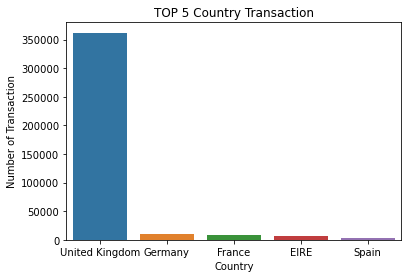

In [20]:
sns.barplot(x=country_transaction.index, y=country_transaction.values)
plt.title('TOP 5 Country Transaction')
plt.xlabel('Country')
plt.ylabel('Number of Transaction')

Terdapat gap yang jauh antara UK dengan negara-negara lainnya. Ini adalah suatu hal yang wajar terlebih jika memang pusat penjualannya ada di UK. Sekarang kita coba cek jumlah transaksi di beberapa negara lainnya.

In [21]:
numb_country = online_retail['Country'].nunique()
print(f'Dari data tersebut ada sebanyak {numb_country} negara.')

country = pd.DataFrame(online_retail['Country'].value_counts()).reset_index()
country.columns = ['Country', 'Numb of Transaction']
country

Dari data tersebut ada sebanyak 37 negara.


,Country,Numb of Transaction
0,United Kingdom,361878
1,Germany,9495
2,France,8491
3,EIRE,7485
4,Spain,2533
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1877
8,Portugal,1480
9,Australia,1259


### Country x Numb of Customer

In [22]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [23]:
country_customer = online_retail[['Country', 'CustomerID']].groupby(['Country'])
country_customer = country_customer.agg({'CustomerID':'nunique'})
country_customer.sort_values(by='CustomerID', ascending=False).reset_index()

,Country,CustomerID
0,United Kingdom,3950
1,Germany,95
2,France,87
3,Spain,31
4,Belgium,25
5,Switzerland,21
6,Portugal,19
7,Italy,15
8,Finland,12
9,Austria,11


Sejalan dengan jumlah transaksi di tiap negaranya, jumlah pembeli di UK, Germany, dan France juga menjadi TOP 3 dari number of customer. Salah satu contoh yang menarik ialah customer yang berasal dari negara EIRE tapi memiliki transaksi sebanyak 7485.

### Returned Goods

In [24]:
online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Pertama, kita coba cek terlebih dahulu ada berapa jumlah kuantitas barang yang direturn oleh pembeli menggunakan DataFrame yang telah kita buat sebelumnya.

In [25]:
quantity_return = abs(quantity_under_zero['Quantity'].sum())
print(f'Jumlah barang yang dikembalikan adalah {quantity_return} buah')

Jumlah barang yang dikembalikan adalah 274808 buah


Sekarang kita coba lihat secara detail, barang apa saja yang dikembalikan beserta jumlah barangnya.

In [26]:
quantity_under_zero[['Description', 'Quantity']].groupby(['Description']).sum().sort_values(by=['Quantity']).head()

,Quantity
Description,
"PAPER CRAFT , LITTLE BIRDIE",-80995
MEDIUM CERAMIC TOP STORAGE JAR,-74494
ROTATING SILVER ANGELS T-LIGHT HLDR,-9367
Manual,-3995
FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150


Data di atas memperlihatkan lima barang terbanyak yang direturn oleh pembeli. Ternyata gap antara barang pertama dan kedua dengan barang ketiga hingga kelima cukup jauh.

### Total Amount

Pada bagian ini kita akan menampilkan grafik time series dari total amount khususnya customer yang berasal dari UK. Langkah pertama yang harus kita lakukan adalah membuang data di mana `Quantity`nya bernilai negatif.

In [27]:
new_retail_online = online_retail.drop(quantity_under_zero.index, axis=0).reset_index(drop=True)
new_retail_online

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
397919,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
397920,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
397921,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
397922,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


Setelah menghilangkan semua row dengan `Quantity` kurang dari nol, selanjutnya kita harus membuat kolom `TotalAmount` yang merupakan hasil perkalian dari `Quantity` dan `UnitPrice`. Lalu kemudian kita bisa membuang kolom `Quantity` dan `UnitPrice`. Terakhir, kita hitung `TotalAmount` di masing-masing `InvoiceDate`nya.

In [28]:
new_retail_online['TotalAmount'] = new_retail_online['Quantity'] * new_retail_online['UnitPrice']

In [29]:
new_retail_online.drop(new_retail_online[['Quantity', 'UnitPrice']], axis=1, inplace=True)

Berhubung karena kita akan menghitung jumlah `Total Amount` berdasarkan tanggal, maka kita akan membuat sebuah kolom baru yaitu `Date` dengan data berupa tanggal pembelian dari kolom `InvoiceDate` yang berisikan tanggal dan waktu pembelian.

In [30]:
new_retail_online['Date'] = [d.date() for d in new_retail_online['InvoiceDate']]
new_retail_online.drop(new_retail_online[['InvoiceDate']], axis=1, inplace=True)
new_retail_online['Date'] = pd.to_datetime(new_retail_online['Date'])

In [31]:
new_retail_online = new_retail_online[['Date', 'InvoiceNo', 'StockCode', 'Description', 
                                       'CustomerID', 'Country', 'TotalAmount']]
new_retail_online.head()

,Date,InvoiceNo,StockCode,Description,CustomerID,Country,TotalAmount
0,2010-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850.0,United Kingdom,15.30
1,2010-12-01,536365,71053,WHITE METAL LANTERN,17850.0,United Kingdom,20.34
2,2010-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,17850.0,United Kingdom,22.00
3,2010-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,17850.0,United Kingdom,20.34
4,2010-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,17850.0,United Kingdom,20.34


In [32]:
new_retail_online = new_retail_online[['Date', 'TotalAmount']].groupby(['Date'])
new_retail_online = new_retail_online.agg({'TotalAmount': 'sum'}).reset_index()
new_retail_online.head()

,Date,TotalAmount
0,2010-12-01,46376.49
1,2010-12-02,47316.53
2,2010-12-03,23921.71
3,2010-12-05,31771.60
4,2010-12-06,31215.64


Terakhir, kita tinggal membuat plottingan grafik line chart dengan y axisnya kolom `TotalAmount` dan x axisnya `InvoiceDate`.

Text(0, 0.5, 'TotalAmount')

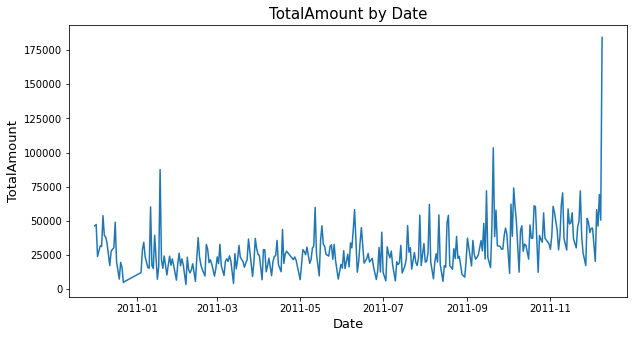

In [33]:
plt.figure(figsize=(10,5))
sns.lineplot(data=new_retail_online, x=new_retail_online['Date'], y=new_retail_online['TotalAmount'])
plt.title('TotalAmount by Date', fontsize=15)
plt.xlabel('Date', fontsize=13)
plt.ylabel('TotalAmount', fontsize=13)

Grafik line chart di atas memperlihatkan pergerakan dari `TotalAmount` yang terus meningkat, terlebih dari bulan Sep hingga bulan Des. Hal ini dibuktikan juga dengan meningkatnya baseline di bulan tersebut. Namun, apakah besarnya `TotalAmount` ini dipengaruhi juga oleh banyaknya `Quantity` dari barang yang dibeli?